# Inverstigating a dataset - No Show Appointments

## Describing the features of the data

**This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.**:


● ‘PatientId’ Identification of a patient

● ‘AppointmentID’ Identification of each appointment

● ‘Gender’ Male or Female.

● ‘AppointmentDay’ The day of the actual appointment, when they have to visit the doctor.

● ‘Hipertension’ True or False

● ‘Diabetes’ True or False

● ‘Alcoholism’ True or False

● ‘Handcap’ True or False

● ‘SMS_received’ 1 or more messages sent to the patient.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

**Introductions :
Questions we are trying to answer :**

Which is more attendance or absenteeism
Who is more absent than the other?
What is the most frequent time ?

In [1]:
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### 1.1 Load Data

## General Properties

In [2]:
data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
data.shape

(110527, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
data.duplicated().sum()

0

### Data Cleaning

In [6]:
#  ID should be int
# "PatientId" will be converted to int

data.PatientId = data.PatientId.astype('int64')
data.PatientId.dtypes

dtype('int64')

In [7]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Age looks weird
len(data[data["Age"] == 0]),len(data[data["Age"] < 0])

(3539, 1)

In [9]:
# Convert "ScheduledDay" and "AppointmentDay" columns into date-time

data.ScheduledDay = pd.to_datetime(data.ScheduledDay)
data.AppointmentDay = pd.to_datetime(data.AppointmentDay)
data[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

**From ScheduledDay and AppointmentDay, I'll create new Features:**

● ScheduledHour: hour of Scheduled Day

● AppointmentTime: time of Appointment Day

● ScheduleDate: date of Scheduled Day

● AppointmentDate: date of Appointment Day

● AppointmentWeekDay: the day of the week of Appointment Day

● AppointmentMonth: the month of Appointment Day

● AppointmentMonth: the month of Appointment Day

● WaitingDays: waiting days before Appointment Day

In [10]:
# Get time columns from date-time columns
data['ScheduledHour'] = pd.to_datetime(data.ScheduledDay).dt.hour
data['AppointmentTime'] = pd.to_datetime(data.AppointmentDay).dt.time

# Convert time included date-time columns to only date columns
data['ScheduledDay'] = data['ScheduledDay'].dt.date
data['AppointmentDay'] = data['AppointmentDay'].dt.date

# Get month and week of day information from dates
data['AppointmentWeekDay'] = pd.to_datetime(data.AppointmentDay).dt.day_name()
data['AppointmentMonth'] = pd.to_datetime(data.AppointmentDay).dt.month_name()

# Calculate waiting days before appointment
data['WaitingDays'] = data.AppointmentDay - data.ScheduledDay

# Convert datatype to int
data.WaitingDays = data.WaitingDays.astype('str')
data.WaitingDays = data.WaitingDays.apply(lambda x: x.split()[0])
data.WaitingDays = data.WaitingDays.astype('int64')

In [11]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,AppointmentTime,AppointmentWeekDay,AppointmentMonth,WaitingDays
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,00:00:00,Friday,April,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,00:00:00,Friday,April,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,00:00:00,Friday,April,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,00:00:00,Friday,April,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,00:00:00,Friday,April,0


In [12]:
data.AppointmentTime.nunique()

1

In [13]:
# drop `AppointmentTime` column
data.drop(columns='AppointmentTime',inplace=True)

In [14]:
#Is there any scheduled day after appointment day? if True WaitingDays will be negative and this is impossible
df_error = data[data.WaitingDays < 0 ]
df_error

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,AppointmentWeekDay,AppointmentMonth,WaitingDays
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,10,Monday,May,-1
55226,7896293967868,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,14,Tuesday,May,-1
64175,24252258389979,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,13,Wednesday,May,-1
71533,998231581612122,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,13,Thursday,May,-6
72362,3787481966821,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,6,Tuesday,May,-1


In [15]:
#Is there any scheduled day after appointment day? if True WaitingDays will be negative and this is impossible
# Remove this rows from dataset

data = data[~(data.WaitingDays <0)]

In [16]:
data['Gender'] = data['Gender'].replace({'F': 'Fmale', 'M': 'Male'})

data['state'] = data['No-show'].replace({'No': 'attend', 'Yes': 'absent'})

data['SMS_State'] = data['SMS_received'].replace({0: 'unreceived', 1: 'received'})

## Exploratory Data Analysis

### Research Question 1 (Which is more attendance or absenteeism?)

c:\users\top10\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


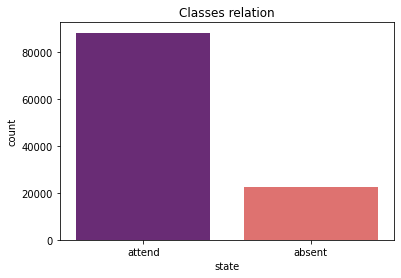

In [17]:
sns.countplot(data['state'], palette='magma')
plt.title("Classes relation")
plt.show()

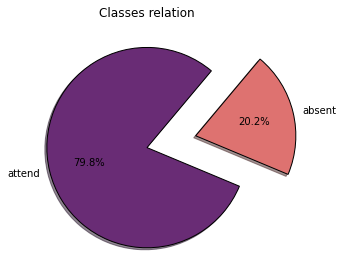

In [18]:
slices = [len(data[data['state']=='attend']),len(data[data['state']=='absent'])]
labels = ['attend','absent']
explode = [0, 0.5]
colors=['#692c75','#de7270']
plt.pie(slices,labels=labels,
        explode=explode,autopct='%1.1f%%',
        shadow=True,startangle=50,wedgeprops={'edgecolor':'black'},colors=colors)


plt.title('Classes relation')
plt.tight_layout()
plt.show()

### Research Question 2  (Replace this header name!)

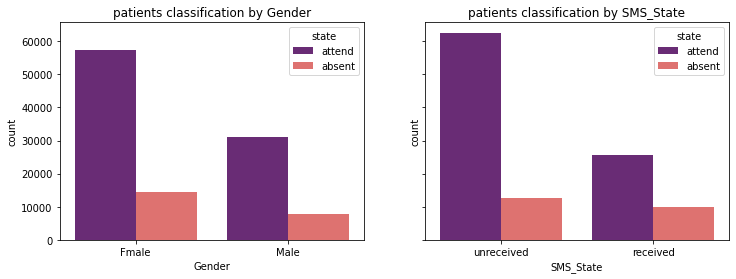

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='Gender', data=data, hue='state', ax=ax1, palette='magma');
ax1.title.set_text("patients classification by Gender")

sns.countplot(x='SMS_State', data=data, hue='state', ax=ax2, palette='magma');
ax2.title.set_text("patients classification by SMS_State")

fig.set_figwidth(12)
fig.set_figheight(4)


● Females schedule appointments more frequently than men.

● state ratio is high in SMS received group than unreceived group.

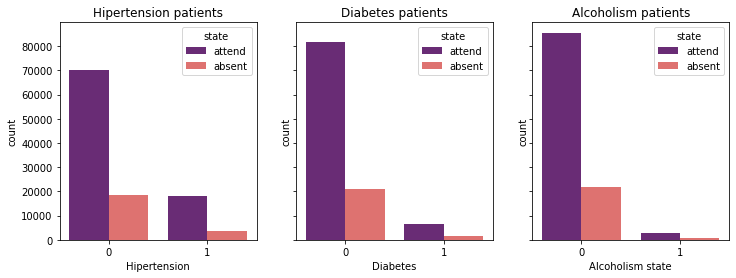

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)

sns.countplot(x='Hipertension', data=data, hue='state', ax=ax1, palette='magma');
ax1.title.set_text("Hipertension patients")

sns.countplot(x='Diabetes', data=data, hue='state', ax=ax2, palette='magma');
ax2.title.set_text("Diabetes patients")

sns.countplot(x='Alcoholism', data=data, hue='state', ax=ax3, palette='magma');
ax3.title.set_text("Alcoholism patients")
plt.xlabel('Alcoholism state')

fig.set_figwidth(12)
fig.set_figheight(4)

● It is rare for patients with hypertension to not go to an appointment.

● The graphs above show that hypertension is more common than diabetes in the patients participating in the study.

### Research Question 3 (What is the most frequent time ?)

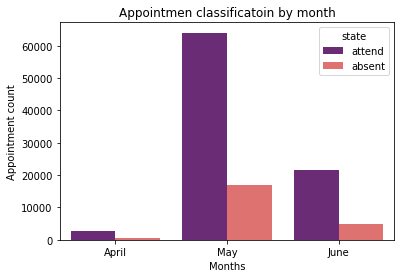

In [21]:
# AppointmentMonth and Show relationship
sns.countplot(x='AppointmentMonth', data=data, hue='state', palette='magma')
plt.title("Appointmen classificatoin by month")
plt.ylabel('Appointment count')
plt.xlabel('Months')
fig.set_figwidth(15)
fig.set_figheight(5)

● in (May) patients make an appointment

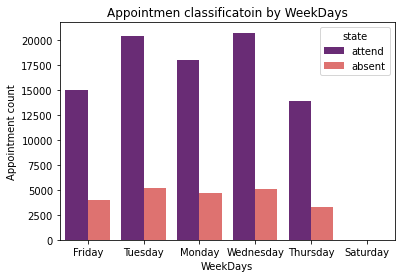

In [22]:
# AppointmentWeekDay and Show relationship
sns.countplot(x='AppointmentWeekDay', data=data, hue='state', palette='magma')
plt.title("Appointmen classificatoin by WeekDays")
plt.ylabel('Appointment count')
plt.xlabel('WeekDays')
fig.set_figwidth(15)
fig.set_figheight(5)

● in (Tuesday,Wednesday) patients make an appointment

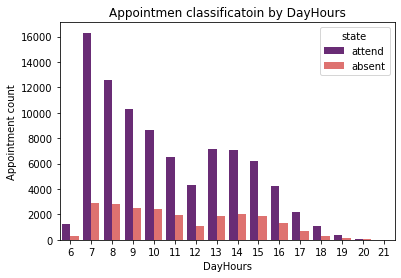

In [23]:
sns.countplot(x='ScheduledHour', data=data, hue='state', palette='magma')
plt.title("Appointmen classificatoin by DayHours")
plt.ylabel('Appointment count')
plt.xlabel('DayHours')
fig.set_figwidth(15)
fig.set_figheight(5)


● in (7,8,9,10) patients make an appointment

### Limitations:
**Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employeed or not , or whether the patient have a series medical issue or not.
there we some illogical data such as patients with age 0 or less**

### Conclusions

● no null values or missing but there is records have zero or negative one in age

● no duplicates

● Showing rate for men and women are similar.

● Hypertension is an important factor for higher attendance frequency.

● no-show ratio is high in SMS received group than unreceived group.

● There is no significant difference between the days of the week in terms of not missing an appointment.

● data is imbalanced